In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/EECS 598 Adv. ML/final_project/first_model'

/content/drive/MyDrive/EECS 598 Adv. ML/final_project/first_model


In [3]:
import numpy as np
from keras.applications import vgg16
from keras.preprocessing import image
from keras.activations import relu, softmax
import keras.backend as K
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [4]:
from tensorflow.keras.applications import VGG16
import tensorflow.python.keras.backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [5]:
# load the model
model = vgg16.VGG16(weights='imagenet')

553467904/553467096 [==============================] - 3s 0us/step


In [6]:
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text
  
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

In [27]:
adv_dev = load_set('adv_Flickr_8k.devImages.txt')

In [28]:
len(adv_dev)

20

In [14]:
import os

In [21]:
for i in os.walk('adv_examples'):
  folder = i[2]

In [37]:
folder

['3695064885_a6922f06b2.png',
 '2596619849_7b635dd310.png',
 '3665179773_dd217416fc.png',
 '2391812384_7429b5e567.png',
 '2987328689_96a2d814f1.png',
 '2635164923_2a774f7854.png',
 '2992614450_b5a6692239.png',
 '2490687446_9d46fdf5a9.png',
 '269650644_059a84ece5.png',
 '1679557684_50a206e4a9.png',
 '2090545563_a4e66ec76b.png',
 '3484841598_e26ee96aab.png',
 '2735792721_b8fe85e803.png',
 '3582685410_05315a15b8.png',
 '3616808182_fb4eaec778.png',
 '3515904775_f8acc5909e.png',
 '3652150541_8fb5a3a5d1.png']

In [38]:
forgotten = []
for i in list(adv_dev):
  string = str(i) + '.png'
  if string not in folder:
    forgotten.append(i)

In [39]:
forgotten

['1579798212_d30844b4c5', '3583321426_f373c52161', '3393035454_2d2370ffd4']

Predicted: [('n02808440', 'bathtub', 0.8214194), ('n04493381', 'tub', 0.16281618), ('n07615774', 'ice_lolly', 0.004070519)]
0 0.8151906 [('n02808440', 'bathtub', 0.8151906), ('n04493381', 'tub', 0.16791649), ('n07615774', 'ice_lolly', 0.0044916347)]
20 0.6626275 [('n02808440', 'bathtub', 0.6626275), ('n04493381', 'tub', 0.27541828), ('n07615774', 'ice_lolly', 0.026504872)]
40 0.48491535 [('n02808440', 'bathtub', 0.48491535), ('n04493381', 'tub', 0.34002256), ('n07615774', 'ice_lolly', 0.09974552)]
60 0.30565748 [('n04493381', 'tub', 0.3326476), ('n02808440', 'bathtub', 0.30565748), ('n07615774', 'ice_lolly', 0.2437888)]
80 0.1687826 [('n07615774', 'ice_lolly', 0.41251087), ('n04493381', 'tub', 0.26546648), ('n02808440', 'bathtub', 0.1687826)]


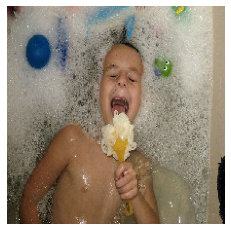

Predicted: [('n02892201', 'brass', 0.075896546), ('n02939185', 'caldron', 0.057974294), ('n02672831', 'accordion', 0.05188527)]
0 0.070369706 [('n02892201', 'brass', 0.070369706), ('n02939185', 'caldron', 0.058327436), ('n02672831', 'accordion', 0.05189563)]
20 0.015501839 [('n03709823', 'mailbag', 0.057150364), ('n02939185', 'caldron', 0.054385703), ('n02672831', 'accordion', 0.046447147)]
40 0.003918022 [('n03709823', 'mailbag', 0.058740694), ('n02939185', 'caldron', 0.046162285), ('n04204347', 'shopping_cart', 0.042281907)]
60 0.0012757506 [('n03709823', 'mailbag', 0.059523623), ('n04204347', 'shopping_cart', 0.046353113), ('n02939185', 'caldron', 0.040683106)]
80 0.00054094533 [('n03709823', 'mailbag', 0.06019283), ('n04204347', 'shopping_cart', 0.047605846), ('n02797295', 'barrow', 0.042701185)]


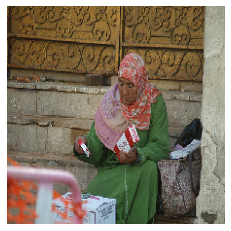

Predicted: [('n03792782', 'mountain_bike', 0.5767445), ('n04509417', 'unicycle', 0.18336166), ('n03000684', 'chain_saw', 0.04509578)]
0 0.5608697 [('n03792782', 'mountain_bike', 0.5608697), ('n04509417', 'unicycle', 0.18864395), ('n03000684', 'chain_saw', 0.04665588)]
20 0.24617364 [('n04509417', 'unicycle', 0.26397607), ('n03792782', 'mountain_bike', 0.24617364), ('n09246464', 'cliff', 0.09590423)]
40 0.07985367 [('n04509417', 'unicycle', 0.24248765), ('n09246464', 'cliff', 0.17369439), ('n03792782', 'mountain_bike', 0.07985367)]
60 0.026602201 [('n09246464', 'cliff', 0.21850105), ('n04509417', 'unicycle', 0.20339052), ('n02133161', 'American_black_bear', 0.06529432)]
80 0.009678315 [('n09246464', 'cliff', 0.22988968), ('n04509417', 'unicycle', 0.16284536), ('n02133161', 'American_black_bear', 0.06895756)]


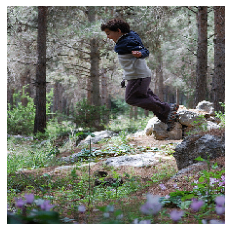

In [40]:
for j in forgotten:
  img_path = 'Flicker8k_Dataset/' + str(j) + '.jpg'
  img = image.load_img(img_path, target_size=(224,224))

  plt.imshow(img)
  plt.grid('off')
  plt.axis('off')

  # Create a batch and preprocess the image
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = vgg16.preprocess_input(x)

  # Get the initial predictions
  preds = model.predict(x)
  initial_class = np.argmax(preds)
  print('Predicted:', vgg16.decode_predictions(preds, top=3)[0])

  sess = K.get_session()
  x_adv = x
  # Added noise
  x_noise = np.zeros_like(x)
  epochs = 100
  epsilon = 0.01
  prev_probs = []

  for i in range(epochs): 
      # One hot encode the initial class
      target = K.one_hot(initial_class, 1000)
      
      
      # Get the loss and gradient of the loss wrt the inputs
      
      loss = K.categorical_crossentropy(target, tf.reshape(model.output, target.shape))
      grads = K.gradients(loss, model.input)

      # Get the sign of the gradient
      delta = K.sign(grads[0])
      x_noise = x_noise + delta

      # Perturb the image
      x_adv = x_adv + epsilon*delta

      # Get the new image and predictions
      x_adv = sess.run(x_adv, feed_dict={model.input:x})
      preds = model.predict(x_adv)

      # Store the probability of the target class
      prev_probs.append(preds[0][initial_class])

      if i%20==0:
          print(i, preds[0][initial_class], vgg16.decode_predictions(preds, top=3)[0])

  t = np.zeros_like(x_adv[0])
  t[:,:,0] = x_adv[0][:,:,2]
  t[:,:,1] = x_adv[0][:,:,1]
  t[:,:,2] = x_adv[0][:,:,0]  
  plt.imshow(np.clip((t+[123.68, 116.779, 103.939]), 0, 255)/255)
  plt.grid('off')
  plt.axis('off')
  plt.savefig('adv_examples/' + str(j) + '.png')
  plt.show()



Predicted: [('n03388043', 'fountain', 0.9660016), ('n09229709', 'bubble', 0.007398697), ('n09288635', 'geyser', 0.0025179042)]


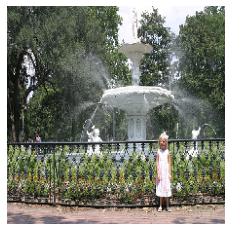

In [41]:
img_path = 'Flicker8k_Dataset/224369028_b1ac40d1fa.jpg'
img = image.load_img(img_path, target_size=(224,224))

plt.imshow(img)
plt.grid('off')
plt.axis('off')

# Create a batch and preprocess the image
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = vgg16.preprocess_input(x)

# Get the initial predictions
preds = model.predict(x)
initial_class = np.argmax(preds)
print('Predicted:', vgg16.decode_predictions(preds, top=3)[0])

In [42]:
# import tensorflow.python.keras.backend as K
# Get current session (assuming tf backend)
sess = K.get_session()
# Initialize adversarial example with input image
x_adv = x
# Added noise
x_noise = np.zeros_like(x)

In [44]:
def plot_img(x):
    """
    x is a BGR image with shape (? ,224, 224, 3) 
    """
    t = np.zeros_like(x[0])
    t[:,:,0] = x[0][:,:,2]
    t[:,:,1] = x[0][:,:,1]
    t[:,:,2] = x[0][:,:,0]  
    plt.imshow(np.clip((t+[123.68, 116.779, 103.939]), 0, 255)/255)
    plt.grid('off')
    plt.axis('off')
    plt.show()
    # plt.savefig('adv_examples/' + str(x) + '.png')

0 6.4783504e-05 [('n03000134', 'chainlink_fence', 0.18001378), ('n01518878', 'ostrich', 0.1369577), ('n03535780', 'horizontal_bar', 0.1013985)]
20 6.35077e-05 [('n03000134', 'chainlink_fence', 0.18756397), ('n01518878', 'ostrich', 0.1344296), ('n03535780', 'horizontal_bar', 0.09665201)]
40 6.271773e-05 [('n03000134', 'chainlink_fence', 0.19499287), ('n01518878', 'ostrich', 0.13160363), ('n03535780', 'horizontal_bar', 0.09303916)]
60 6.1880695e-05 [('n03000134', 'chainlink_fence', 0.20314656), ('n01518878', 'ostrich', 0.12841566), ('n03535780', 'horizontal_bar', 0.08912134)]
80 6.114271e-05 [('n03000134', 'chainlink_fence', 0.21101642), ('n01518878', 'ostrich', 0.12543775), ('n03535780', 'horizontal_bar', 0.08582511)]
100 6.0797665e-05 [('n03000134', 'chainlink_fence', 0.2197731), ('n01518878', 'ostrich', 0.12129872), ('n03535780', 'horizontal_bar', 0.08273286)]
120 6.052863e-05 [('n03000134', 'chainlink_fence', 0.22915895), ('n01518878', 'ostrich', 0.11737201), ('n03535780', 'horizonta

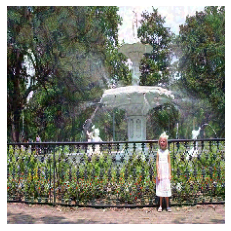

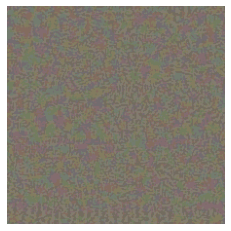

In [45]:

# Set variables
epochs = 400
epsilon = 0.01
prev_probs = []

for i in range(epochs): 
    # One hot encode the initial class
    target = K.one_hot(initial_class, 1000)
    
    
    # Get the loss and gradient of the loss wrt the inputs
    
    loss = K.categorical_crossentropy(target, tf.reshape(model.output, target.shape))
    grads = K.gradients(loss, model.input)

    # Get the sign of the gradient
    delta = K.sign(grads[0])
    x_noise = x_noise + delta

    # Perturb the image
    x_adv = x_adv + epsilon*delta

    # Get the new image and predictions
    x_adv = sess.run(x_adv, feed_dict={model.input:x})
    preds = model.predict(x_adv)

    # Store the probability of the target class
    prev_probs.append(preds[0][initial_class])

    if i%20==0:
        print(i, preds[0][initial_class], vgg16.decode_predictions(preds, top=3)[0])

plot_img(x_adv)
plot_img(x_adv-x)